<a href="https://colab.research.google.com/github/Mehrdadt1999/Customer_order_data_analysis/blob/master/Customer_order_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [1]:
import openpyxl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('data.csv', index_col=0)

# EDA

In [3]:
df.head()

,CustomerID,OrderID,Date,Revenue
0,28448640,32937314,20190321,5100
1,11253773,32934605,20190321,5100
2,11257623,32943465,20190321,11706
3,11012874,32941555,20190321,5100
4,10686656,32944079,20190321,5100


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 261960 entries, 0 to 261959
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   CustomerID  261960 non-null  int64
 1   OrderID     261960 non-null  int64
 2   Date        261960 non-null  int64
 3   Revenue     261960 non-null  int64
dtypes: int64(4)
memory usage: 10.0 MB


In [5]:
df["Date"] = pd.to_datetime(df["Date"], format="%Y%m%d")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 261960 entries, 0 to 261959
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   CustomerID  261960 non-null  int64         
 1   OrderID     261960 non-null  int64         
 2   Date        261960 non-null  datetime64[ns]
 3   Revenue     261960 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 10.0 MB


In [7]:
df.describe()

,CustomerID,OrderID,Date,Revenue
count,2.619600e+05,2.619600e+05,261960,261960.000000
mean,7.169337e+06,4.526490e+07,2019-11-03 01:34:56.674301440,6109.570595
min,4.651320e+05,3.293076e+07,2019-03-21 00:00:00,106.000000
25%,3.267469e+06,4.006175e+07,2019-08-21 00:00:00,2451.000000
50%,6.663396e+06,4.479244e+07,2019-11-09 00:00:00,5100.000000
75%,1.122706e+07,5.004593e+07,2020-01-15 00:00:00,7960.000000
max,4.654955e+07,5.885319e+07,2020-04-19 00:00:00,175200.000000
std,4.957141e+06,6.121027e+06,NaN,5646.762773


In [8]:
df["Date"].unique()

<DatetimeArray>
['2019-03-21 00:00:00', '2019-03-22 00:00:00', '2019-03-23 00:00:00',
 '2019-03-24 00:00:00', '2019-03-25 00:00:00', '2019-03-26 00:00:00',
 '2019-03-27 00:00:00', '2019-03-28 00:00:00', '2019-03-29 00:00:00',
 '2019-03-30 00:00:00',
 ...
 '2020-04-10 00:00:00', '2020-04-11 00:00:00', '2020-04-12 00:00:00',
 '2020-04-13 00:00:00', '2020-04-14 00:00:00', '2020-04-15 00:00:00',
 '2020-04-16 00:00:00', '2020-04-17 00:00:00', '2020-04-18 00:00:00',
 '2020-04-19 00:00:00']
Length: 396, dtype: datetime64[ns]

In [9]:
df['CustomerID'].unique().shape

(179680,)

In [10]:
df["OrderID"].unique().shape[0] == df.shape[0]

True

In [11]:
df['Revenue'].value_counts()

,count
Revenue,
5834,6959
6935,6287
5160,5925
10972,5759
730,5491
...,...
16741,1
13236,1
15131,1


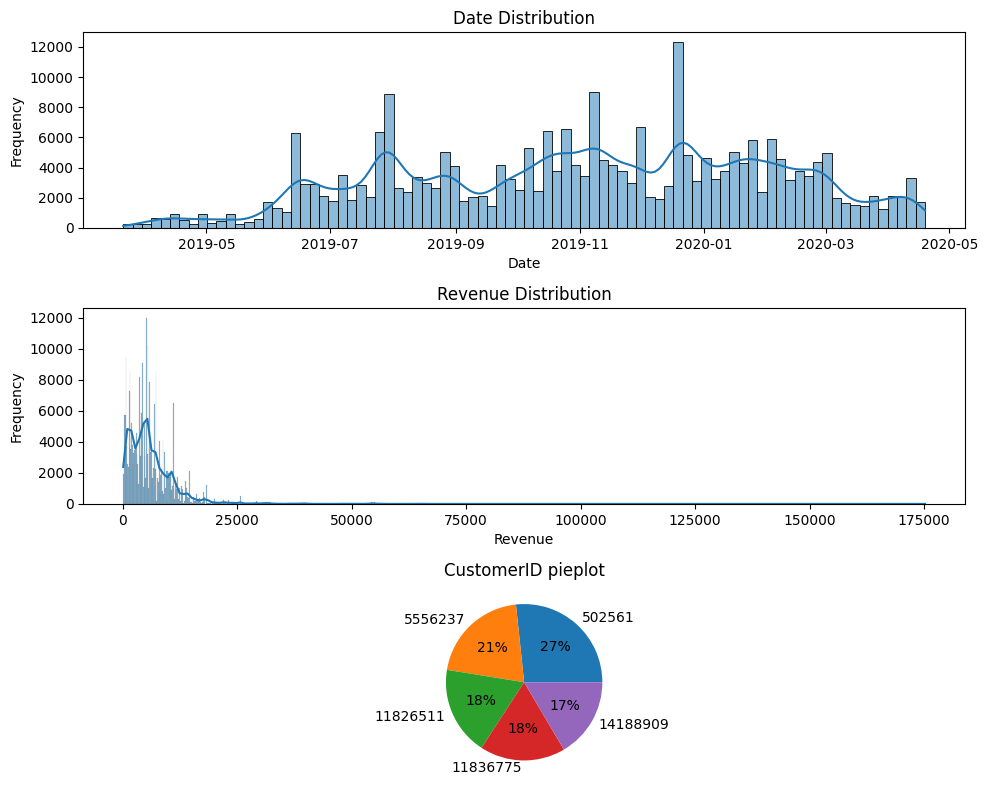

In [12]:
fig, axes = plt.subplots(3, 1, figsize=(10, 8))

sns.histplot(df["Date"], kde=True, ax=axes[0])
axes[0].set_title("Date Distribution")
axes[0].set_xlabel("Date")
axes[0].set_ylabel("Frequency")

sns.histplot(df["Revenue"], kde=True, ax=axes[1])
axes[1].set_title("Revenue Distribution")
axes[1].set_xlabel("Revenue")
axes[1].set_ylabel("Frequency")

axes[2].pie(
    df["CustomerID"].value_counts()[:5],
    labels=df["CustomerID"].value_counts()[:5].index,
    autopct="%.0f%%",
)
axes[2].set_title("CustomerID pieplot")

plt.tight_layout()
plt.show()

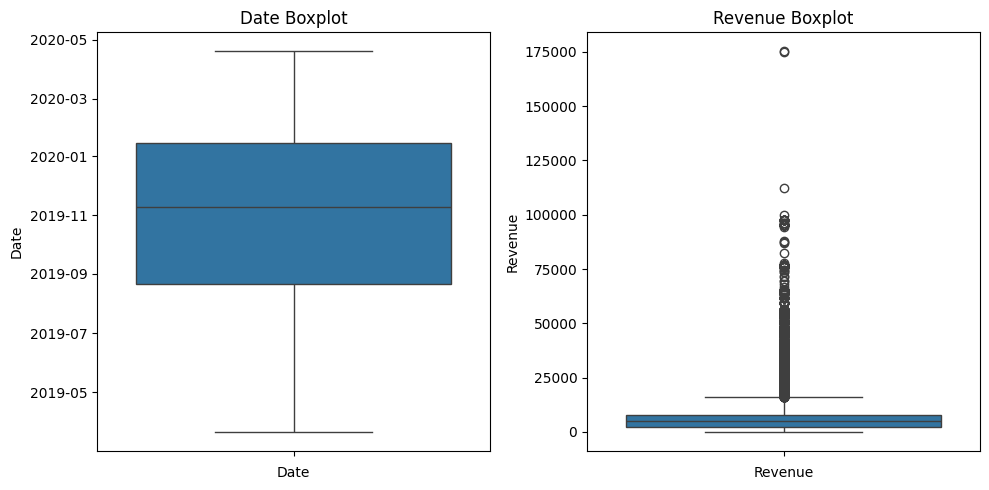

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.boxplot(df["Date"], ax=axes[0])
axes[0].set_title("Date Boxplot")
axes[0].set_xlabel("Date")

sns.boxplot(df["Revenue"], ax=axes[1])
axes[1].set_title("Revenue Boxplot")
axes[1].set_xlabel("Revenue")

plt.tight_layout()
plt.show()

In [14]:
df[df["Revenue"] > np.percentile(df["Revenue"], 90)]["Revenue"].describe()

,Revenue
count,25517.000000
mean,18095.900811
std,9152.480837
min,11570.000000
25%,13174.000000
50%,14642.000000
75%,18320.000000
max,175200.000000


In [15]:
df[df["Revenue"] > np.percentile(df["Revenue"], 90)]["Date"].describe()

,Date
count,25517
mean,2019-11-14 20:02:25.032723456
min,2019-03-21 00:00:00
25%,2019-08-19 00:00:00
50%,2019-11-30 00:00:00
75%,2020-02-04 00:00:00
max,2020-04-19 00:00:00


In [16]:
most_frequent_person = df[df['CustomerID'] == 502561]

In [17]:
most_frequent_person

,CustomerID,OrderID,Date,Revenue
5986,502561,35011640,2019-05-13,10972
6048,502561,34970613,2019-05-13,10972
6049,502561,34970867,2019-05-13,10972
8310,502561,35843019,2019-05-31,9871
11228,502561,36202016,2019-06-10,10605
...,...,...,...,...
257679,502561,57763562,2020-04-10,10972
258201,502561,57992101,2020-04-12,18311
258318,502561,57992324,2020-04-12,18311
258333,502561,57991900,2020-04-12,18311


In [18]:
most_frequent_person[["Date", "Revenue"]].describe()

,Date,Revenue
count,231,231.000000
mean,2019-12-01 18:04:40.519480576,14548.411255
min,2019-05-13 00:00:00,316.000000
25%,2019-09-25 00:00:00,8968.500000
50%,2019-12-04 00:00:00,10972.000000
75%,2020-02-19 00:00:00,17560.000000
max,2020-04-14 00:00:00,56110.000000
std,NaN,8621.161961


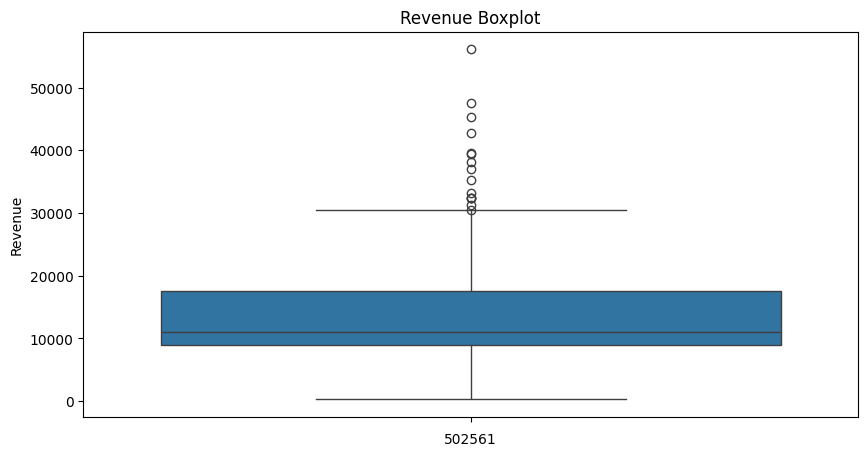

In [19]:
plt.figure(figsize = (10, 5))
sns.boxplot(most_frequent_person["Revenue"])
plt.title("Revenue Boxplot")
plt.xlabel("502561")
plt.show()

# Calculation of monthly key indicators

In [20]:
df['Month'] = df['Date'].dt.to_period('M')
df

,CustomerID,OrderID,Date,Revenue,Month
0,28448640,32937314,2019-03-21,5100,2019-03
1,11253773,32934605,2019-03-21,5100,2019-03
2,11257623,32943465,2019-03-21,11706,2019-03
3,11012874,32941555,2019-03-21,5100,2019-03
4,10686656,32944079,2019-03-21,5100,2019-03
...,...,...,...,...,...
261955,14814009,58778867,2020-04-19,8760,2020-04
261956,17043123,58761937,2020-04-19,5240,2020-04
261957,2853558,58757250,2020-04-19,8760,2020-04
261958,3114170,58818638,2020-04-19,11920,2020-04


In [21]:
customer_count = df.groupby('Month')['CustomerID'].nunique()
customer_count

,CustomerID
Month,
2019-03,531
2019-04,3312
2019-05,3431
2019-06,15413
2019-07,23194
2019-08,19437
2019-09,14498
2019-10,25285
2019-11,28401


In [22]:
order_count = df.groupby("Month")["OrderID"].count()
order_count

,OrderID
Month,
2019-03,572
2019-04,3958
2019-05,3809
2019-06,17556
2019-07,26788
2019-08,22570
2019-09,16236
2019-10,29813
2019-11,32708


In [23]:
aov_value = df.groupby("Month")["Revenue"].mean()
aov_value

,Revenue
Month,
2019-03,5885.479021
2019-04,6073.112683
2019-05,6745.508532
2019-06,6461.452438
2019-07,5568.359041
2019-08,5792.550510
2019-09,5107.107046
2019-10,5675.472143
2019-11,5754.326342


In [24]:
frequency = order_count/customer_count
frequency

,0
Month,
2019-03,1.077213
2019-04,1.195048
2019-05,1.110172
2019-06,1.139038
2019-07,1.154954
2019-08,1.161187
2019-09,1.119879
2019-10,1.179079
2019-11,1.151650


In [25]:
frequency = df.groupby('Month')['CustomerID'].value_counts().groupby('Month').mean()
frequency

,count
Month,
2019-03,1.077213
2019-04,1.195048
2019-05,1.110172
2019-06,1.139038
2019-07,1.154954
2019-08,1.161187
2019-09,1.119879
2019-10,1.179079
2019-11,1.151650


In [26]:
total_revenue = df.groupby("Month")["Revenue"].sum()
total_revenue

,Revenue
Month,
2019-03,3366494
2019-04,24037380
2019-05,25693642
2019-06,113437259
2019-07,149165202
2019-08,130737865
2019-09,82918990
2019-10,169202851
2019-11,188212506


In [27]:
month_most_order = order_count.idxmax()
month_most_order

Period('2019-11', 'M')

In [28]:
month_most_revenue = total_revenue.idxmax()
month_most_revenue

Period('2019-11', 'M')

In [29]:
result = pd.DataFrame({"customer_count": customer_count,
                       "order_count": order_count,
                       "aov_value": aov_value,
                       "frequency": frequency,
                       "total_revenue": total_revenue})
result

,customer_count,order_count,aov_value,frequency,total_revenue
Month,,,,,
2019-03,531,572,5885.479021,1.077213,3366494
2019-04,3312,3958,6073.112683,1.195048,24037380
2019-05,3431,3809,6745.508532,1.110172,25693642
2019-06,15413,17556,6461.452438,1.139038,113437259
2019-07,23194,26788,5568.359041,1.154954,149165202
2019-08,19437,22570,5792.550510,1.161187,130737865
2019-09,14498,16236,5107.107046,1.119879,82918990
2019-10,25285,29813,5675.472143,1.179079,169202851
2019-11,28401,32708,5754.326342,1.151650,188212506


# More EDA

In [30]:
df["Week"] = df["Date"].dt.to_period("W")
df

,CustomerID,OrderID,Date,Revenue,Month,Week
0,28448640,32937314,2019-03-21,5100,2019-03,2019-03-18/2019-03-24
1,11253773,32934605,2019-03-21,5100,2019-03,2019-03-18/2019-03-24
2,11257623,32943465,2019-03-21,11706,2019-03,2019-03-18/2019-03-24
3,11012874,32941555,2019-03-21,5100,2019-03,2019-03-18/2019-03-24
4,10686656,32944079,2019-03-21,5100,2019-03,2019-03-18/2019-03-24
...,...,...,...,...,...,...
261955,14814009,58778867,2020-04-19,8760,2020-04,2020-04-13/2020-04-19
261956,17043123,58761937,2020-04-19,5240,2020-04,2020-04-13/2020-04-19
261957,2853558,58757250,2020-04-19,8760,2020-04,2020-04-13/2020-04-19
261958,3114170,58818638,2020-04-19,11920,2020-04,2020-04-13/2020-04-19


In [31]:
customer_count_w = df.groupby('Week')['CustomerID'].nunique()
customer_count_w

,CustomerID
Week,
2019-03-18/2019-03-24,166
2019-03-25/2019-03-31,371
2019-04-01/2019-04-07,692
2019-04-08/2019-04-14,954
2019-04-15/2019-04-21,864
2019-04-22/2019-04-28,659
2019-04-29/2019-05-05,759
2019-05-06/2019-05-12,915
2019-05-13/2019-05-19,605


In [32]:
order_count_w = df.groupby("Week")["OrderID"].count()
order_count_w

,OrderID
Week,
2019-03-18/2019-03-24,176
2019-03-25/2019-03-31,396
2019-04-01/2019-04-07,749
2019-04-08/2019-04-14,1128
2019-04-15/2019-04-21,979
2019-04-22/2019-04-28,722
2019-04-29/2019-05-05,861
2019-05-06/2019-05-12,975
2019-05-13/2019-05-19,655


In [33]:
aov_value_w = df.groupby("Week")["Revenue"].mean()
aov_value_w

,Revenue
Week,
2019-03-18/2019-03-24,4713.255682
2019-03-25/2019-03-31,6406.467172
2019-04-01/2019-04-07,4806.100134
2019-04-08/2019-04-14,6670.367908
2019-04-15/2019-04-21,6442.592441
2019-04-22/2019-04-28,6152.671745
2019-04-29/2019-05-05,5991.341463
2019-05-06/2019-05-12,6837.208205
2019-05-13/2019-05-19,8772.650382


In [34]:
frequency_w = order_count_w/customer_count_w
frequency_w

,0
Week,
2019-03-18/2019-03-24,1.060241
2019-03-25/2019-03-31,1.067385
2019-04-01/2019-04-07,1.082370
2019-04-08/2019-04-14,1.182390
2019-04-15/2019-04-21,1.133102
2019-04-22/2019-04-28,1.095599
2019-04-29/2019-05-05,1.134387
2019-05-06/2019-05-12,1.065574
2019-05-13/2019-05-19,1.082645


In [35]:
total_revenue_w = df.groupby("Week")["Revenue"].sum()
total_revenue_w

,Revenue
Week,
2019-03-18/2019-03-24,829533
2019-03-25/2019-03-31,2536961
2019-04-01/2019-04-07,3599769
2019-04-08/2019-04-14,7524175
2019-04-15/2019-04-21,6307298
2019-04-22/2019-04-28,4442229
2019-04-29/2019-05-05,5158545
2019-05-06/2019-05-12,6666278
2019-05-13/2019-05-19,5746086


In [36]:
result_w = pd.DataFrame({"customer_count": customer_count_w,
                       "order_count": order_count_w,
                       "aov_value": aov_value_w,
                       "frequency": frequency_w,
                       "total_revenue": total_revenue_w})
result_w

,customer_count,order_count,aov_value,frequency,total_revenue
Week,,,,,
2019-03-18/2019-03-24,166,176,4713.255682,1.060241,829533
2019-03-25/2019-03-31,371,396,6406.467172,1.067385,2536961
2019-04-01/2019-04-07,692,749,4806.100134,1.082370,3599769
2019-04-08/2019-04-14,954,1128,6670.367908,1.182390,7524175
2019-04-15/2019-04-21,864,979,6442.592441,1.133102,6307298
2019-04-22/2019-04-28,659,722,6152.671745,1.095599,4442229
2019-04-29/2019-05-05,759,861,5991.341463,1.134387,5158545
2019-05-06/2019-05-12,915,975,6837.208205,1.065574,6666278
2019-05-13/2019-05-19,605,655,8772.650382,1.082645,5746086


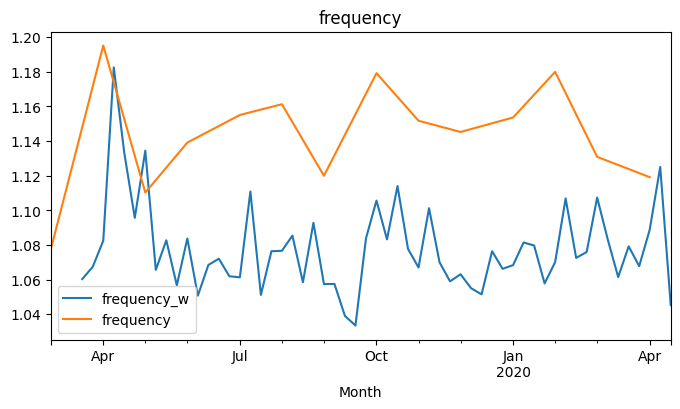

In [37]:
result_w['frequency'].plot(kind='line', figsize=(8, 4), title='frequency')
result["frequency"].plot(kind='line', figsize=(8, 4), title='frequency')
plt.legend(["frequency_w", "frequency"])
plt.show()

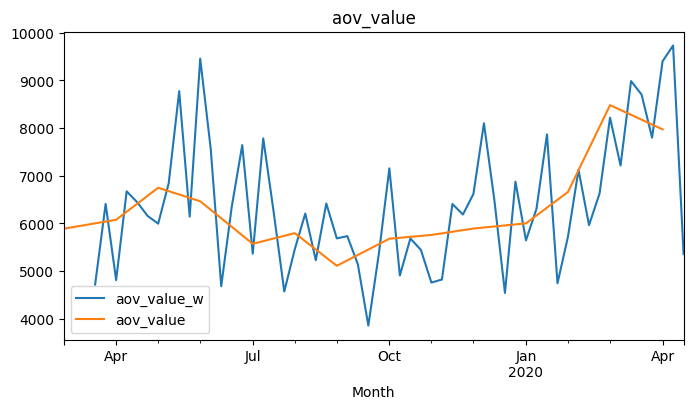

In [38]:
result_w['aov_value'].plot(kind='line', figsize=(8, 4), title='aov_value')
result["aov_value"].plot(kind='line', figsize=(8, 4), title='aov_value')
plt.legend(["aov_value_w", "aov_value"])
plt.show()

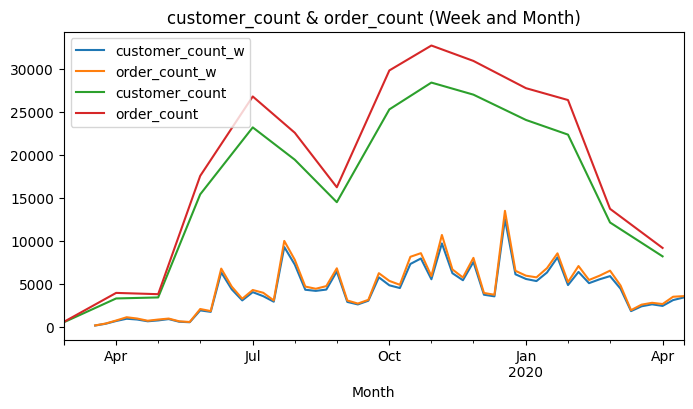

In [39]:
result_w['customer_count'].plot(kind='line', figsize=(8, 4))
result_w["order_count"].plot(kind='line', figsize=(8, 4))
result['customer_count'].plot(kind='line', figsize=(8, 4))
result["order_count"].plot(kind='line', figsize=(8, 4))
plt.title("customer_count & order_count (Week and Month)")
plt.legend(['customer_count_w', 'order_count_w', 'customer_count', 'order_count'])
plt.show()

In [40]:
most_purchase_persons = df["CustomerID"].value_counts()[:5].index
most_purchase_persons

Index([502561, 5556237, 11826511, 11836775, 14188909], dtype='int64', name='CustomerID')

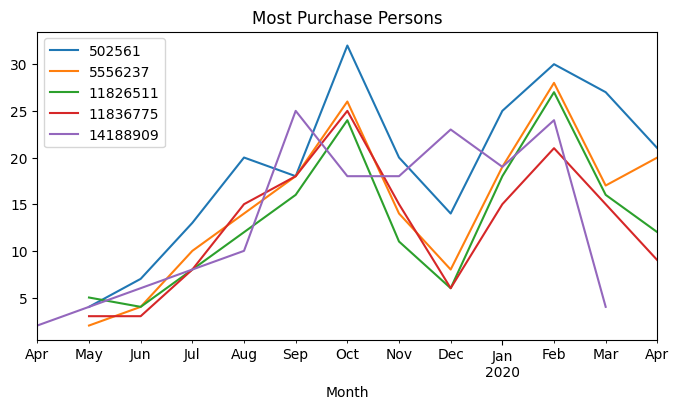

In [41]:
df[df['CustomerID'] == most_purchase_persons[0]].groupby("Month")["OrderID"].count().plot(kind="line", figsize=(8, 4))
df[df['CustomerID'] == most_purchase_persons[1]].groupby("Month")["OrderID"].count().plot(kind="line", figsize=(8, 4))
df[df['CustomerID'] == most_purchase_persons[2]].groupby("Month")["OrderID"].count().plot(kind="line", figsize=(8, 4))
df[df['CustomerID'] == most_purchase_persons[3]].groupby("Month")["OrderID"].count().plot(kind="line", figsize=(8, 4))
df[df['CustomerID'] == most_purchase_persons[4]].groupby("Month")["OrderID"].count().plot(kind="line", figsize=(8, 4))
plt.title("Most Purchase Persons")
plt.legend([most_purchase_persons[0], most_purchase_persons[1], most_purchase_persons[2], most_purchase_persons[3], most_purchase_persons[4]])
plt.show()

In [42]:
customer_count_d = df.groupby('Date')['CustomerID'].nunique()
customer_count_d

,CustomerID
Date,
2019-03-21,22
2019-03-22,23
2019-03-23,18
2019-03-24,103
2019-03-25,53
...,...
2020-04-15,437
2020-04-16,70
2020-04-17,258


In [43]:
order_count_d = df.groupby("Date")["OrderID"].count()
order_count_d

,OrderID
Date,
2019-03-21,22
2019-03-22,23
2019-03-23,19
2019-03-24,112
2019-03-25,56
...,...
2020-04-15,452
2020-04-16,70
2020-04-17,260


In [44]:
aov_value_d = df.groupby("Date")["Revenue"].mean()
aov_value_d

,Revenue
Date,
2019-03-21,7201.909091
2019-03-22,3624.913043
2019-03-23,4791.368421
2019-03-24,4434.660714
2019-03-25,6646.821429
...,...
2020-04-15,8819.323009
2020-04-16,10087.714286
2020-04-17,3237.923077


In [45]:
frequency_d = order_count_d/customer_count_d
frequency_d

,0
Date,
2019-03-21,1.000000
2019-03-22,1.000000
2019-03-23,1.055556
2019-03-24,1.087379
2019-03-25,1.056604
...,...
2020-04-15,1.034325
2020-04-16,1.000000
2020-04-17,1.007752


In [46]:
total_revenue_d = df.groupby("Date")["Revenue"].sum()
total_revenue_d

,Revenue
Date,
2019-03-21,158442
2019-03-22,83373
2019-03-23,91036
2019-03-24,496682
2019-03-25,372222
...,...
2020-04-15,3986334
2020-04-16,706140
2020-04-17,841860


In [47]:
day_most_order = order_count_d.idxmax()
day_most_order

Timestamp('2019-07-27 00:00:00')

In [48]:
day_most_revenue = total_revenue_d.idxmax()
day_most_revenue

Timestamp('2019-07-29 00:00:00')

In [49]:
result_d = pd.DataFrame({"customer_count": customer_count_d,
                       "order_count": order_count_d,
                       "aov_value": aov_value_d,
                       "frequency": frequency_d,
                       "total_revenue": total_revenue_d})
result_d

,customer_count,order_count,aov_value,frequency,total_revenue
Date,,,,,
2019-03-21,22,22,7201.909091,1.000000,158442
2019-03-22,23,23,3624.913043,1.000000,83373
2019-03-23,18,19,4791.368421,1.055556,91036
2019-03-24,103,112,4434.660714,1.087379,496682
2019-03-25,53,56,6646.821429,1.056604,372222
...,...,...,...,...,...
2020-04-15,437,452,8819.323009,1.034325,3986334
2020-04-16,70,70,10087.714286,1.000000,706140
2020-04-17,258,260,3237.923077,1.007752,841860


In [50]:
result_d["day_name"] = result_d.index.dayofweek
result_d["Month"] = result_d.index.month
result_d['is_weekend'] = result_d['day_name'].isin([5, 6]).astype(int)
# result_d['revenue_roll_3'] = result_d['total_revenue'].rolling(window=3).mean()
# result_d['revenue_roll_7'] = result_d['total_revenue'].rolling(window=7).mean()
result_d

,customer_count,order_count,aov_value,frequency,total_revenue,day_name,Month,is_weekend
Date,,,,,,,,
2019-03-21,22,22,7201.909091,1.000000,158442,3,3,0
2019-03-22,23,23,3624.913043,1.000000,83373,4,3,0
2019-03-23,18,19,4791.368421,1.055556,91036,5,3,1
2019-03-24,103,112,4434.660714,1.087379,496682,6,3,1
2019-03-25,53,56,6646.821429,1.056604,372222,0,3,0
...,...,...,...,...,...,...,...,...
2020-04-15,437,452,8819.323009,1.034325,3986334,2,4,0
2020-04-16,70,70,10087.714286,1.000000,706140,3,4,0
2020-04-17,258,260,3237.923077,1.007752,841860,4,4,0


In [51]:
result_d.fillna(-1, inplace=True)
result_d

,customer_count,order_count,aov_value,frequency,total_revenue,day_name,Month,is_weekend
Date,,,,,,,,
2019-03-21,22,22,7201.909091,1.000000,158442,3,3,0
2019-03-22,23,23,3624.913043,1.000000,83373,4,3,0
2019-03-23,18,19,4791.368421,1.055556,91036,5,3,1
2019-03-24,103,112,4434.660714,1.087379,496682,6,3,1
2019-03-25,53,56,6646.821429,1.056604,372222,0,3,0
...,...,...,...,...,...,...,...,...
2020-04-15,437,452,8819.323009,1.034325,3986334,2,4,0
2020-04-16,70,70,10087.714286,1.000000,706140,3,4,0
2020-04-17,258,260,3237.923077,1.007752,841860,4,4,0


#Build Model

In [52]:
from prophet import Prophet

In [53]:
df_prophet = pd.DataFrame()
df_prophet['ds'] = result_d.index
df_prophet['y'] = result_d["total_revenue"].values
df_prophet

,ds,y
0,2019-03-21,158442
1,2019-03-22,83373
2,2019-03-23,91036
3,2019-03-24,496682
4,2019-03-25,372222
...,...,...
391,2020-04-15,3986334
392,2020-04-16,706140
393,2020-04-17,841860
394,2020-04-18,2424060


In [54]:
line = int(len(df_prophet)*0.7)
prohpet_train = df_prophet.iloc[:line]
prohpet_test = df_prophet.iloc[line:]

In [55]:
prohpet_test

,ds,y
277,2019-12-23,8006446
278,2019-12-24,9566742
279,2019-12-25,5790324
280,2019-12-26,5356711
281,2019-12-27,1151665
...,...,...
391,2020-04-15,3986334
392,2020-04-16,706140
393,2020-04-17,841860
394,2020-04-18,2424060


In [56]:
model = Prophet()
model.fit(df_prophet)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplpbmbr4v/j9ctefai.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplpbmbr4v/6gi2mxgm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=408', 'data', 'file=/tmp/tmplpbmbr4v/j9ctefai.json', 'init=/tmp/tmplpbmbr4v/6gi2mxgm.json', 'output', 'file=/tmp/tmplpbmbr4v/prophet_modela84ltlz8/prophet_model-20250526143227.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:32:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:32:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [57]:
future = model.make_future_dataframe(periods=30)
future.tail()

,ds
421,2020-05-15
422,2020-05-16
423,2020-05-17
424,2020-05-18
425,2020-05-19


In [58]:
predict = model.predict(future)
y_pred = predict[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

In [59]:
y_pred

,ds,yhat,yhat_lower,yhat_upper
0,2019-03-21,3.847505e+05,-3.174960e+06,4.475835e+06
1,2019-03-22,-3.307372e+05,-4.182554e+06,3.470194e+06
2,2019-03-23,1.317014e+06,-2.423148e+06,5.154180e+06
3,2019-03-24,2.022347e+06,-2.193549e+06,5.813202e+06
4,2019-03-25,9.493185e+05,-3.063805e+06,4.677375e+06
...,...,...,...,...
421,2020-05-15,3.005592e+06,-7.028428e+05,6.932311e+06
422,2020-05-16,4.622296e+06,2.989615e+05,8.403657e+06
423,2020-05-17,5.296581e+06,1.231863e+06,9.083277e+06
424,2020-05-18,4.192505e+06,4.729510e+05,8.022697e+06


In [60]:
y_pred

,ds,yhat,yhat_lower,yhat_upper
0,2019-03-21,3.847505e+05,-3.174960e+06,4.475835e+06
1,2019-03-22,-3.307372e+05,-4.182554e+06,3.470194e+06
2,2019-03-23,1.317014e+06,-2.423148e+06,5.154180e+06
3,2019-03-24,2.022347e+06,-2.193549e+06,5.813202e+06
4,2019-03-25,9.493185e+05,-3.063805e+06,4.677375e+06
...,...,...,...,...
421,2020-05-15,3.005592e+06,-7.028428e+05,6.932311e+06
422,2020-05-16,4.622296e+06,2.989615e+05,8.403657e+06
423,2020-05-17,5.296581e+06,1.231863e+06,9.083277e+06
424,2020-05-18,4.192505e+06,4.729510e+05,8.022697e+06


In [61]:
y_pred["yhat"]

,yhat
0,3.847505e+05
1,-3.307372e+05
2,1.317014e+06
3,2.022347e+06
4,9.493185e+05
...,...
421,3.005592e+06
422,4.622296e+06
423,5.296581e+06
424,4.192505e+06


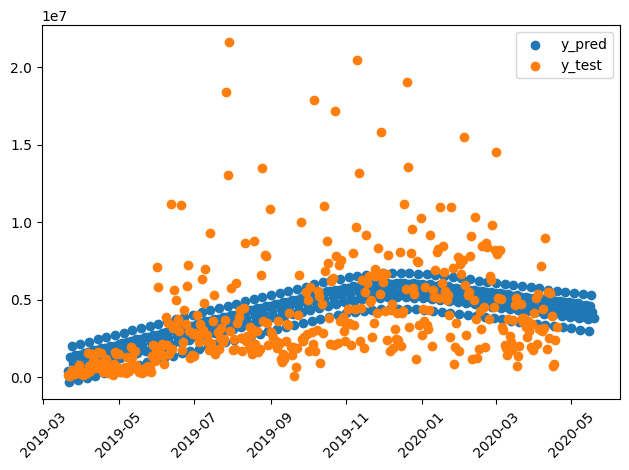

In [62]:
plt.scatter(y_pred["ds"], y_pred["yhat"])
plt.scatter(df_prophet["ds"], df_prophet["y"])
plt.legend(["y_pred", "y_test"])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

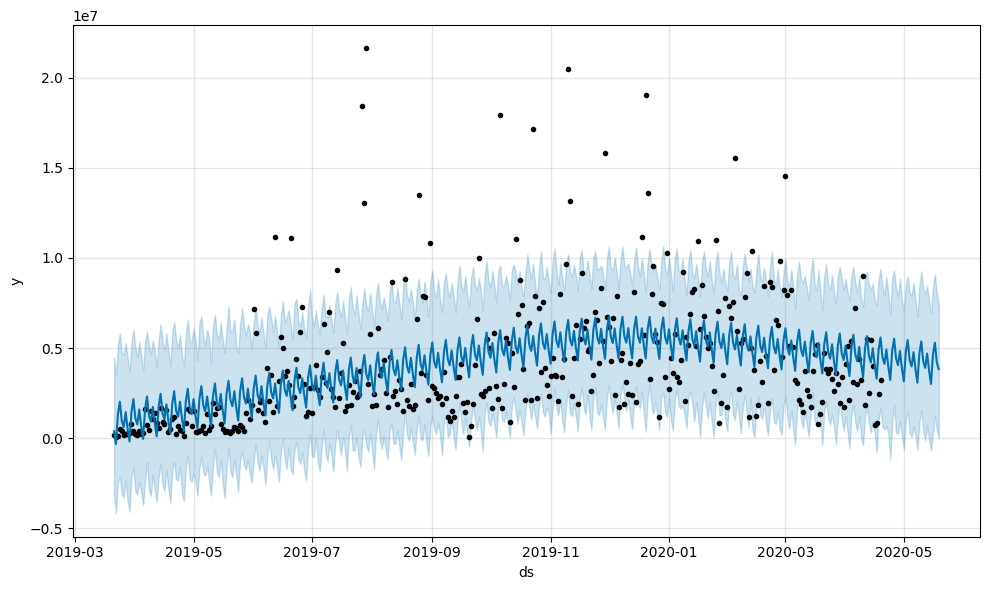

In [63]:
fig1 = model.plot(predict)

In [64]:
y_pred["yhat"].iloc[396]

np.float64(4484413.471427999)

In [65]:
y_pred.to_csv("total_revenue.csv")
result_d.to_csv("df_day.csv")
result.to_csv("df_month.csv")
result_w.to_csv("df_week.csv")

In [66]:
y_pred.to_excel("customer_order_data.xlsx", sheet_name = "total_revenue")
result_d.to_excel("customer_order_data.xlsx", sheet_name = "day")
result.to_excel("customer_order_data.xlsx", sheet_name = "month")
result_w.to_excel("customer_order_data.xlsx", sheet_name = "week")

In [68]:
with pd.ExcelWriter('customer_order_data.xlsx') as writer:
    y_pred.to_excel(writer, sheet_name='total_revenue')
    result_d.to_excel(writer, sheet_name='day')
    result.to_excel(writer, sheet_name='month')
    result_w.to_excel(writer, sheet_name='week')